## HW2
### Supervised Learning Models 
#### Gian Zlupko 

#### 1. Find the url for the California Test Score Data Set from the following website:

https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).

In [193]:
import pandas as pd 
import numpy as np 

# load data
cal_data_full = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv") 

# subset the data to remove 'readscr' and 'mathscr' and the non-numeric data
cal_data = cal_data_full.loc[:, 'enrltot': 'elpct']


# print out first few rows after subsetting 
print(cal_data.head(5)) 

# store target and predictor variables 
y = cal_data['testscr']
X = cal_data.loc[:, cal_data.columns != 'testscr']


   enrltot   teachers    calwpct    mealpct  computer     testscr   compstu  \
0      195  10.900000   0.510200   2.040800        67  690.799988  0.343590   
1      240  11.150000  15.416700  47.916698       101  661.200012  0.420833   
2     1550  82.900002  55.032299  76.322601       169  643.599976  0.109032   
3      243  14.000000  36.475399  77.049202        85  647.700012  0.349794   
4     1335  71.500000  33.108601  78.427002       171  640.849976  0.128090   

       expnstu        str     avginc      elpct  
0  6384.911133  17.889910  22.690001   0.000000  
1  5099.380859  21.524664   9.824000   4.583333  
2  5501.954590  18.697226   8.978000  30.000002  
3  7101.831055  17.357143   8.978000   0.000000  
4  5235.987793  18.671329   9.080333  13.857677  


#### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature. 

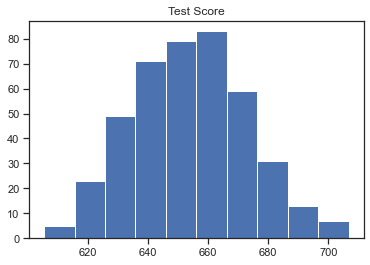

In [194]:
import matplotlib.pyplot as plt 

# visualize the target feature: testscr 
plt.hist(y)
plt.title('Test Score') 
plt.show()

The target variable, test score, appears to be normally distributed. Next, per my review of the data dictionary, I visualize three predictor variables that I believe will be related to the target variable, test scores. In particular, I've selected income ('avginc'; e.g. district avg. income), expenditure ('expnstu'; e.g. avg. school spending per student), and teachers (e.g. no. teachers per district)

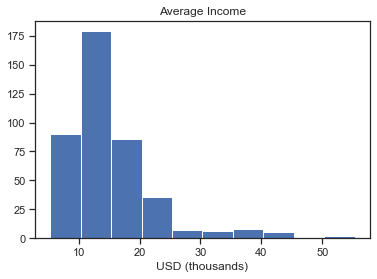

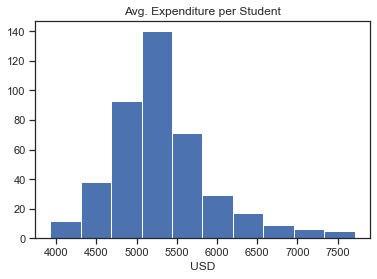

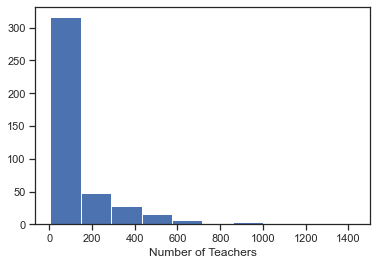

In [195]:
# plot average income
plt.hist(X['avginc']) 
plt.title("Average Income")
plt.xlabel('USD (thousands)')
plt.show() 

# plot avg. expenditure per student 

plt.hist(X['expnstu'])
plt.title('Avg. Expenditure per Student')
plt.xlabel('USD')
plt.show() 

# plot number of teachers 
plt.hist(X['teachers'])
plt.xlabel('Number of Teachers')
plt.show() 


The average spending (expenditure) per student appears to be fairly normally distributed. In contrast, the number of teachers per district is severly right skewed with the majority of districts possessing fewer than 200 teachers. Finally, the average income for each district was also slightly right skewed, though not as severly as the teacher distribution. 

#### 1.2 Visualize the dependency of the target on each feature from 1.1.

To accomplish this, I used scatterplots to visualize the bivariate relationships between the predictor variables presented above and test scores. To do so, instead of generating three scatterplots, I used the scatter grid plot from seaborn. Doing so does present the univariate distributions again but I like the efficient use of space that scatter grid offers for this task. 

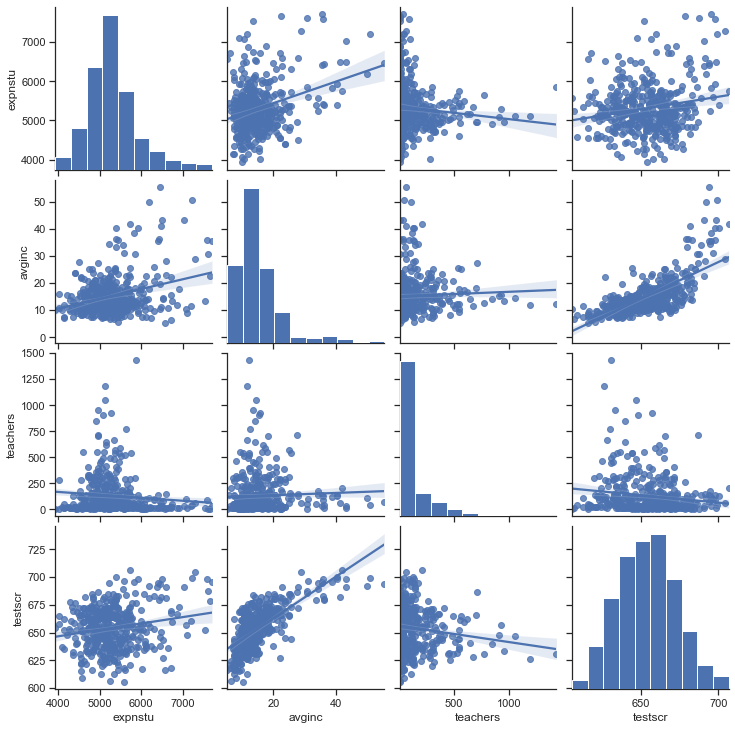

In [196]:
import seaborn as sns; sns.set(style = 'ticks', color_codes = True)

# create a subset of the original data 
plot_df = cal_data_full[['expnstu', 'avginc', 'teachers', 'testscr']]

# create the seaborn scatter plot grid with regression lines 
sns.pairplot(plot_df, kind = "reg")  


#### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [197]:
# set up training and test data 
from sklearn.model_selection import train_test_split

# perform data split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 300) 

#import cross validation functions from sk learn
from sklearn.model_selection import cross_val_score

# Set up CV with 5 fold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)


After performing data splits and activating the CV functions from sklearn, I fit all four models using their default parameters and calculate their mean performance using 5-fold cross validation. 

In [198]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statistics import mean 


print("KNN Regressor using 5-fold CV:\n{}".format(
mean(cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=kfold))))

print("Linear Regression using 5-fold CV:\n{}".format(
mean(cross_val_score(LinearRegression(), X_train, y_train, cv=kfold))))


print("Ridge regression using 5-fold CV:\n{}".format(
mean(cross_val_score(Ridge(), X_train, y_train, cv=kfold))))


print("Lasso regression using 5-fold CV:\n{}".format(
mean(cross_val_score(Lasso(), X_train, y_train, cv=kfold))))



KNN Regressor using 5-fold CV:
0.01353483933842734
Linear Regression using 5-fold CV:
0.7757202102778243
Ridge regression using 5-fold CV:
0.7746220744309076
Lasso regression using 5-fold CV:
0.7745824701325399


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.31261672276378, tolerance: 8.16751976588816
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2724.287127391086, tolerance: 8.463100722157392
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244.42518037612172, tolerance: 8.725539666838987
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarnin

We can see through the error messages that the models did not reach convergence without using scaled data. L1 and L2 regularizes assume that the data are centered around zero, so it is not surprising that we received error messages without scaling the data first. The Knn regressor performed paticularly poorly on the non-scaled data. In the next code chunk, I use Standar Scaler for preprocessing the data and refit the same models above to determine if Standard Scaler is useful in the current context.

In [199]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


# KNN Regressor with CV
print("KNN Regressor on scaled data using 5-fold CV:\n{}".format(
mean(cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=kfold))))

# Linear regression with CV 
print("Linear regression on scaled data using 5-fold CV:\n{}".format(
mean(cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=kfold))))

# Ridge regression with CV
print("Ridge regression on scaled data using 5-fold CV:\n{}".format(
mean(cross_val_score(Ridge(), X_train_scaled, y_train, cv=kfold))))

# Lasso regression with CV
print("Lasso regression on scaled data using 5-fold CV:\n{}".format(
mean(cross_val_score(Lasso(), X_train_scaled, y_train, cv=kfold))))



KNN Regressor on scaled data using 5-fold CV:
0.7348549682126415
Linear regression on scaled data using 5-fold CV:
0.7757202102778256
Ridge regression on scaled data using 5-fold CV:
0.7770334584621673
Lasso regression on scaled data using 5-fold CV:
0.7768586391090692


We an see that scaling the training data significantly improved the KNN regressor's performance and it also removed the errors that we were receiving about model convergence. 

#### 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In the following code chunks associated with problem 1.4 I build a pipeline for the sake of simplicity.

In [200]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# new data split 
X_dev, X_test, y_dev, y_test = train_test_split(X, y, random_state = 51) 

pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
params = {'kneighborsregressor__n_neighbors' :[1,2,3,4,5,6,7,8,9,10]} # note double underscore 
grid = GridSearchCV(pipe, params, cv = 10)
grid.fit(X_dev, y_dev)

# print Knn regressor performance
print(grid.cv_results_['mean_test_score'][0])

# print best estimator to view optimal parameter value
print("Knn - Best estimator:\n{}".format(grid.best_estimator_))



0.5172102636949585
Knn - Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=9))])


In [201]:
# ridge 
pipe = make_pipeline(StandardScaler(), Ridge())
params = {'ridge__alpha':[0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]}
grid = GridSearchCV(pipe, params, cv = 10)
grid.fit(X_dev, y_dev)

# print score
print(grid.cv_results_['mean_test_score'][0])

# print best estimator to view optimal parameter value
print("Ridge - Best estimator:\n{}".format(grid.best_estimator_))



0.7754135813658424
Ridge - Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=10))])


In [202]:
# lasso 
pipe = make_pipeline(StandardScaler(), Lasso(max_iter = 100000))
params = {'lasso__alpha':[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]}
grid = GridSearchCV(pipe, params, cv = 10)
grid.fit(X_dev, y_dev)

# print performance for the Lasso model 
print(grid.cv_results_['mean_test_score'][0])


# print best estimator to view optimal parameter value
print("Lasso - Best estimator:\n{}".format(grid.best_estimator_))

0.7754493817914158
Lasso - Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.5, max_iter=100000))])


Using grid search CV to tune the parameters did improve slightly improve each models' performance. 

#### 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In the code chunk below, I use the parameter values obtained above for the ridge and lasso models and compare their coefficients.

In [203]:
# evaluate coefficients for the ridge model 
# best model was determined above to have an alpha value of 10 

ridge10 = Ridge(alpha = 10).fit(X_train_scaled, y_train)


# calculating coefficients

coeff_ridge = pd.DataFrame(X_train.columns)
coeff_ridge['Coefficient Estimate'] = pd.Series(ridge10.coef_)
print(coeff_ridge.head(5)) # print strongest coefficients in the ridge model 

# lasso model 

lasso_05 = Lasso(alpha = 0.5).fit(X_train_scaled, y_train)

coeff_lasso = pd.DataFrame(X_train.columns)
coeff_lasso['Coefficient Estimate'] = pd.Series(lasso_05.coef_)
print(coeff_lasso.head(5))

          0  Coefficient Estimate
0   enrltot             -0.612886
1  teachers              0.257547
2   calwpct             -1.694115
3   mealpct             -8.611304
4  computer              0.353899
          0  Coefficient Estimate
0   enrltot             -0.000000
1  teachers             -0.000000
2   calwpct             -0.737914
3   mealpct             -9.770902
4  computer             -0.000000


The results show that, after CV and tuning efforts, the ridge and lasso models estimated different coefficients for the predictors so it appears that the models do not agree which predictors are most important.  

#### 1.6 Discuss which final model you would choose to predict new data

I would use the ridge regression model over the lasso model. Despite the similiarity in their performance (as measured by R^2 here), the lasso penalty has zeroed out some of the predictor variables' coefficients by the nature of the L1 penalty. This means that, effectively, the lasso model is not including some of predictor variables in its attempt to explain variation in the outcome. In contrast, while less parsimonious, I think that the model that would better explain the variation in the outcome would be the model that includes more variables as the ridge model does in this case, even if some of those variables have less of an effect on the outcome. Thus, I would choose the ridge model since its penalty does not rule out predictor variables like the lasso model does. Stated another way, we learn from Müller and Guido (2017; 'IMLP') that, as a rule of thumb, we should use L1 if we think that only a few of the predictors are important. Otherwise, we should default to L2. I choose to do the latter as I do not have domain expertise in the education space, and therefore opt to retain the model that affords me all of the original predictors. 

###  Part II 

Classification on red and white wine characteristics

#### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

In [204]:
import pandas as pd
import os

# change working directory 
os.chdir('/Users/gianzlupko/Desktop/GR5073 ML/gr5073_ML/data')

# read in the red and white wine data sets
red_wine = pd.read_csv("red_wine.csv", sep = ';') 
white_wine = pd.read_csv("white_wine.csv", sep = ';')

# insert new column to beginning of each data frame 

red_wine.insert(0, 'winetype',1) 
red_wine.head(5)

white_wine.insert(0, 'winetype', 0) 
white_wine.head(5) 

# combine the data frames; concatenated by vertically stacking 
wine_data = pd.concat([red_wine, white_wine])

#### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

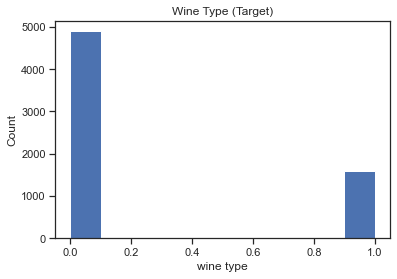

In [205]:
import matplotlib.pyplot as plt
# visualize target feature - wine type

plt.hist(wine_data['winetype'])
plt.xlabel('wine type')
plt.ylabel('Count')
plt.title("Wine Type (Target)")
plt.show()


Next, to visualize the predictors that I think will be most related to wine type, I generate a scatterplot matrix from seaborn again. The univariate distributions are shown on the diagonal of the matrix. 

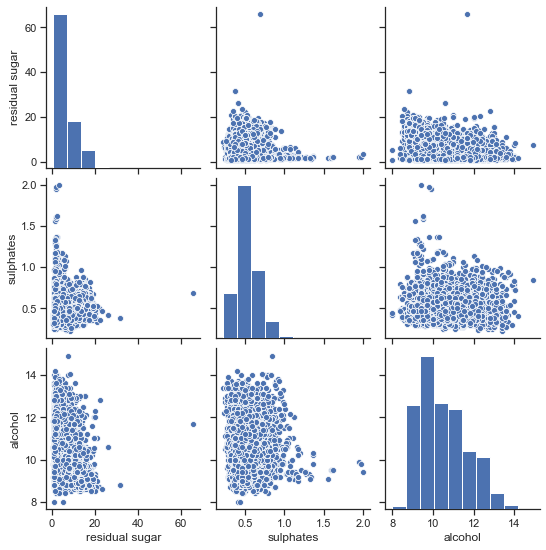

In [206]:
import seaborn as sns 

# create a subset of the original data 
wine_scatter_plots = wine_data[['residual sugar', 'sulphates', 'alcohol']]

# create the seaborn scatter plot grid with regression lines 
sns.pairplot(wine_scatter_plots) 

#### 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

To determine how scaling influences the performance of the classification models, I first run the models without using Standard Scale.Then, I run the models again with Standard Scaler and evalute any differences between the model outputs. 

In [207]:
# first, I'll use stratified CV 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# data split  
X = wine_data.loc[:, wine_data.columns != 'winetype']
y = wine_data['winetype']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1) 

# define stratefied kfold cv 
skfold = StratifiedKFold(n_splits = 5) 

# Knn classifier 

from statistics import mean 

print("Knn:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv = skfold))))


print("Logistic regression:\n{}".format(
mean(cross_val_score(LogisticRegression(penalty = 'none', max_iter = 10000), X_train, y_train, cv=kfold))))

print("Logistic regression with L1 penalty:\n{}".format(
mean(cross_val_score(LogisticRegression(penalty = 'l1', max_iter = 10000, solver = 'liblinear'), X_train, y_train, cv=kfold))))


print("Logistic regression with L2 penalty:\n{}".format(
mean(cross_val_score(LogisticRegression(penalty = 'l2', max_iter = 10000), X_train, y_train, cv=kfold))))



Knn:
0.9390392249776234
Logistic regression:
0.990968040857158
Logistic regression with L1 penalty:
0.9858366766703522
Logistic regression with L2 penalty:
0.9839892592007582


In [208]:
# re-run the models after having scaled the data
from sklearn.preprocessing import StandardScaler

# instantiate standard scaler 
scaler = StandardScaler() 

# fit scaler to data 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit logistic regression model 
logreg = LogisticRegression(penalty = 'none').fit(X_train_scaled, y_train) 

# evaluate performance on train and test sets 
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
print("Unscaled data - Test set score: {:.3f}".format(logreg.score(X_test, y_test)))




Training set score: 0.994
Test set score: 0.990
Unscaled data - Test set score: 0.765


Notice above the difference in the model's performance on the scaled vs unscaled data. Scaling substantially improved the logistic regression model's performance. Below I show how scaling affects the other models. 

In [209]:
# KNN Classifier Comparison on unscaled data

print("KNN Regressor using 5-fold stratified CV with unscaled data:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=skfold))))

# evaluate model performance on unscaled data 
print("KNN Regressor using 5-fold stratified CV with scaled data:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(), X_train_scaled, y_train, cv=skfold))))


# L1 regularized logistic regression 
print("L1 regularized logistic regression using 5-fold stratified CV with unscaled data:\n{}".format(
mean(cross_val_score(LogisticRegression(penalty = 'l1', max_iter = 10000, solver = "liblinear"), X_train, y_train, cv=skfold))))

# L1 regularized logistic regression 
print("L1 regularized logistic regression using 5-fold stratified CV with scaled data:\n{}".format(
mean(cross_val_score(LogisticRegression(penalty = 'l1', max_iter = 10000, solver = "liblinear"), X_train_scaled, y_train, cv=skfold))))

# L2 regularized logistic regression 
print("L2 regularized logistic regression using 5-fold stratified CV with unscaled data:\n{}".format(
mean(cross_val_score(LogisticRegression(penalty = 'l2', max_iter = 10000), X_train, y_train, cv=skfold))))

# L2 regularized logistic regression 
print("L2 regularized logistic regression using 5-fold stratified CV with scaled data:\n{}".format(
mean(cross_val_score(LogisticRegression(penalty = 'l2', max_iter = 10000), X_train_scaled, y_train, cv=skfold))))



KNN Regressor using 5-fold stratified CV with unscaled data:
0.9390392249776234
KNN Regressor using 5-fold stratified CV with scaled data:
0.9921998631074607
L1 regularized logistic regression using 5-fold stratified CV with unscaled data:
0.9858364660664456
L1 regularized logistic regression using 5-fold stratified CV with scaled data:
0.994456905175591
L2 regularized logistic regression using 5-fold stratified CV with unscaled data:
0.9841945980097931
L2 regularized logistic regression using 5-fold stratified CV with scaled data:
0.993841099352393


The results above indicate that scaling the data improved the performance of each model. 

#### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [174]:
# KNN Classifier 
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=skfold)
grid.fit(X_train, y_train)
print(grid.best_params_)
print("KNN Classifier performance = ", grid.score(X_test, y_test))

#Logisitic Regression 
log_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver = 'liblinear', max_iter = 10000))

# create parameter grid for alpha parameter (C) and regularization method 
param_grid = [{'logisticregression__penalty' : ['l1', 'l2'], 
'logisticregression__C' : np.logspace(-4, 4, 20)}] 

# fit the model 
log_mod = GridSearchCV(log_pipe, param_grid, cv = skfold)
log_mod.fit(X_train, y_train)

# find best parameters for log model 
print("best parameters logistic regression:", log_mod.best_params_)

# print performance from best model
print("accuracy:", log_mod.best_score_)



{'kneighborsclassifier__n_neighbors': 1}
KNN Classifier performance =  0.9907692307692307
best parameters logistic regression: {'logisticregression__C': 1.623776739188721, 'logisticregression__penalty': 'l1'}
accuracy: 0.9946620333807192


The results for the logistic regression model improved very slightly albeit they did improve. Using GridSearchCV, l1 regularization with an alpha value of C = 1.63 was determined to be the top performing logistic regression model. 

#### 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Or if you change the random state of the split into training and test data?

In [180]:
# set shuffle 
kf_shuffle  = KFold(n_splits = 5, shuffle = True)

# KNN classifer using the shuffled KFold strategy 
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv= kf_shuffle)
grid.fit(X_train, y_train)
print(grid.best_params_)
print("KNN Classifier performance = ", grid.score(X_test, y_test))

#Logisitic Regression using shuffled KFold strategy 
log_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver = 'liblinear', max_iter = 10000))

# create parameter grid for alpha parameter (C) and regularization method 
param_grid = [{'logisticregression__penalty' : ['l1', 'l2'], 
'logisticregression__C' : np.logspace(-4, 4, 20)}] 

# fit the model 
log_mod = GridSearchCV(log_pipe, param_grid, cv = kf_shuffle)
log_mod.fit(X_train, y_train)

# find best parameters for log model 
print("best parameters logistic regression:", log_mod.best_params_)

# print performance from best model
print("accuracy:", log_mod.best_score_)


{'kneighborsclassifier__n_neighbors': 1}
KNN Classifier performance =  0.9907692307692307
best parameters logistic regression: {'logisticregression__C': 78.47599703514607, 'logisticregression__penalty': 'l1'}
accuracy: 0.9944585900068447


array([[-0.2659282 ,  1.29373546, -0.43636478, -5.40687743,  0.88471464,
         1.44598858, -3.84049241,  5.50911479, -0.21263745,  0.703967  ,
         2.11882708,  0.34135979]])

The best parameters for the logistic regression model did change when using normal k-fold cv with shuffle compared to stratified k-fold cv in the previous problem. Specifically, when using shuffled k-fold cv, the selected C parameter was much larger at 78 compared to previously, using stratified kfold cv at 1.63. This means that, when using stratified kfold, the model opted for a more simple model whereas the model opted for more complexity. 

In [187]:
# change the random state in the data split 
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, random_state = 4003)

# KNN pipe on the new split
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv= skfold)
grid.fit(X_train_new, y_train_new)
print(grid.best_params_)
print("KNN Classifier performance = ", grid.score(X_test_new, y_test_new))

# logistic regression on the new data split 
log_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver = 'liblinear', max_iter = 10000))

# create parameter grid for alpha parameter (C) and regularization method 
param_grid = [{'logisticregression__penalty' : ['l1', 'l2'], 
'logisticregression__C' : np.logspace(-4, 4, 20)}] 

# fit the model 
log_mod = GridSearchCV(log_pipe, param_grid, cv = skfold)
log_mod.fit(X_train_new, y_train_new)

# find best parameters for log model 
print("best parameters logistic regression:", log_mod.best_params_)

# print performance from best model
print("accuracy:", log_mod.best_score_)



{'kneighborsclassifier__n_neighbors': 4}
KNN Classifier performance =  0.9950769230769231
best parameters logistic regression: {'logisticregression__C': 29.763514416313132, 'logisticregression__penalty': 'l1'}
accuracy: 0.9926107513294371


Choosing a new random state when performing a train test data split did change the models' performance as well as the outcomes of their parameter tuning compared to the previous random state. For example, compared to the previous C value of 1.38 on the original data split, using a new random state, the C value obtained for the L1 model was 29.76. While the model accuracy was slightly different as well, the differences in model performance appear to be negligible. This is to be expected as changing the random state only changes the seed used by the random number generator. 


#### 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [192]:
# logistic log reg 

log_mod1 = LogisticRegression() 
log_mod1.fit(X_train_scaled, y_train) 

# print coefficient and model performance
print("log mod1 .coef_: {}".format(log_mod1 .coef_))
print("Training set score: {:.3f}".format(log_mod1.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(log_mod1.score(X_test_scaled, y_test)))

# L1 penalized log reg 

l1_mod1 = LogisticRegression(penalty = 'l1', solver = 'liblinear')
l1_mod1.fit(X_train_scaled, y_train)

# print coefficient and model performance
print("l1_mod1 .coef_: {}".format(l1_mod1 .coef_))
print("Training set score: {:.3f}".format(l1_mod1.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(l1_mod1.score(X_test_scaled, y_test)))


# L2 penalized log reg 
l2_mod1 = LogisticRegression(penalty = 'l2', C = 80)
l2_mod1.fit(X_train_scaled, y_train) 

# print coefficient and model performance
print("l2_mod1 .coef_: {}".format(l2_mod1 .coef_))
print("Training set score: {:.3f}".format(l2_mod1.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(l2_mod1.score(X_test_scaled, y_test)))


log mod1 .coef_: [[ 0.44431908  1.37663129 -0.34361425 -3.38550488  0.93554674  0.80721917
  -3.18298646  3.32114779  0.35190218  0.85692756  1.08017051  0.27953813]]
Training set score: 0.994
Test set score: 0.989
l1_mod1 .coef_: [[ 0.          1.27855214 -0.36883441 -4.3999547   0.8532641   1.10278009
  -3.42700051  4.53255162  0.          0.71354232  1.63241819  0.3063421 ]]
Training set score: 0.995
Test set score: 0.990
l2_mod1 .coef_: [[-0.25971123  1.2941997  -0.43562365 -5.38328005  0.88492353  1.43775728
  -3.83034258  5.48541435 -0.20831449  0.70527766  2.10779163  0.34154197]]
Training set score: 0.994
Test set score: 0.990


Reviewing the logistic regression model performances above, I would choose non-penalized logistic regression model. I would do so because the differences in the model performances are negligible. Further, the non-penalized model does not seem to be severly overfitting to the training data set as the differences in performance on the training and test set are close in value. In light of these results, I would prefer to non-penalized model as it is a more simple representation of the relationships between the predictors and the target class than the models that include penalization. The underlying equation is more parsimonious. Thus, any explanation of the relationships between the predictors and the target that can be gleaned do not need to accomodate for the impact of how a given penalty may be affecting the coefficients obtained.  